<a href="https://colab.research.google.com/github/makgogo/Makgogo-Mphela/blob/main/ML_KNN_Regression_predicting_salary_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries:

In [376]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

Data Preprocessing:

In [377]:
# importing the dataset
salary_data = pd.read_csv("/content/Salary_dataset.csv")

In [378]:
salary_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [379]:
salary_data.drop("Unnamed: 0", axis=1 , inplace=True)

In [380]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [381]:
x = salary_data.drop('Salary', axis=1)
y = salary_data['Salary']

Spliting the dataset into the Training set and Test set:

In [382]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Creating and Training KNN Model:

In [383]:
from sklearn.neighbors import KNeighborsRegressor

In [384]:
regressor = KNeighborsRegressor(n_neighbors=4)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [385]:
KNeighborsRegressor()

KNeighborsRegressor()

Predict Test Results:

In [386]:
y_pred = regressor.predict(x_test)

In [387]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
2,37732.0,42242.00
28,122392.0,113476.25
13,57082.0,57763.75
10,63219.0,57763.75
26,116970.0,113476.25
24,109432.0,108333.75


Evaluation Model Metrics:

In [388]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [389]:
mae = mean_absolute_error(y_test, y_pred)
mae

4025.7916666666665

In [390]:
mse = mean_squared_error(y_test, y_pred)
mse

23911279.302083332

In [391]:
rmse = np.sqrt(mse)
rmse

4889.916083337559

In [392]:
r2 = r2_score(y_test, y_pred)
r2

0.9779401919627041

Visualizing Results :

In [393]:
min(x_test.values), max(x_test.values)

(array([1.6]), array([10.4]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


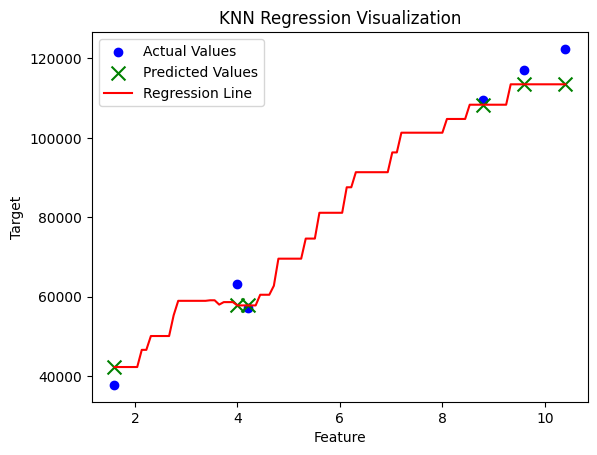

In [394]:
# Assuming x_test and y_test are pandas DataFrame columns
x_test = x_test.astype(float)

# Visualize the results
plt.scatter(x_test.values, y_test.values, label='Actual Values', color='blue')
plt.scatter(x_test.values, y_pred, label='Predicted Values', color='green', marker='x', s=100)

# Plot regression line
x_range = np.linspace(min(x_test.values), max(x_test.values), 100).reshape(-1, 1)
y_range = regressor.predict(x_range)
plt.plot(x_range, y_range, color='red', label='Regression Line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regression Visualization')
plt.show()
